In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank
%matplotlib inline

In [6]:
CPI=pd.read_excel('/Users/zackienzle/CBA/data/AUCPI Index.xlsx', header=5)
IOCR = pd.read_excel('/Users/zackienzle/CBA/data/RBACOR Index.xlsx', header=5)
GTAUD1YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD1YR Corp.xlsx', header=5)
GTAUD2YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD2YR Corp.xlsx', header=5)
GTAUD3YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD3YR Corp.xlsx', header=5)
GTAUD5YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD5YR Corp.xlsx', header=5)
GTAUD10YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD10YR Corp.xlsx', header=5)
BBSW = pd.read_excel('/Users/zackienzle/CBA/data/BBSW3M Index.xlsx', header=5)

cols = {
    'CPI': CPI,
    'IOCR': IOCR,
    'GTAUD1YR': GTAUD1YR,
    'GTAUD2YR': GTAUD2YR,
    'GTAUD3YR': GTAUD3YR,
    'GTAUD5YR': GTAUD5YR,
    'GTAUD10YR': GTAUD10YR,
    'BBSW': BBSW
}

px_last_series = {
    name: data['PX_LAST']
    for name, data in cols.items() if 'PX_LAST' in data.columns
}

df = pd.DataFrame(px_last_series).dropna()
df = df.iloc[::-1]
df = df.reset_index(drop=True)
print(df)
df.info()

       CPI  IOCR  GTAUD1YR  GTAUD2YR  GTAUD3YR  GTAUD5YR  GTAUD10YR    BBSW
0      3.7  4.32     4.083     3.778     3.626     3.662      4.091  4.3351
1      3.8  4.32     4.052     3.727     3.638     3.671      4.008  4.3356
2      3.9  4.32     4.073     3.750     3.608     3.638      4.009  4.3349
3      4.0  4.32     4.057     3.722     3.589     3.621      3.974  4.3398
4      4.1  4.32     4.046     3.705     3.583     3.621      3.951  4.3350
..     ...   ...       ...       ...       ...       ...        ...     ...
302  137.4  4.09     3.517     3.383     3.425     3.655      4.333  3.8096
303  138.8  4.09     3.470     3.322     3.366     3.594      4.278  3.8003
304  139.1  4.09     3.471     3.317     3.357     3.570      4.239  3.7994
305  139.4  4.09     3.508     3.375     3.413     3.622      4.289  3.7938
306  140.7  4.09     3.555     3.441     3.476     3.685      4.360  3.7990

[307 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0

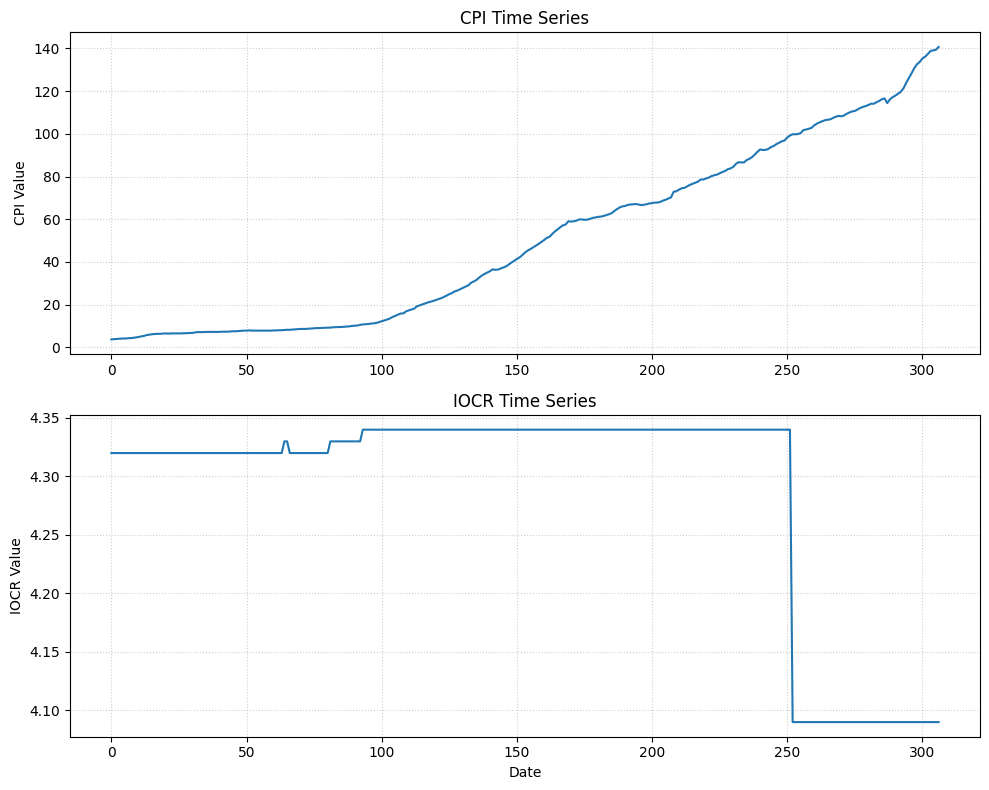

In [7]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(211)
ax1.plot(df.index, df["CPI"])
ax1.set_title("CPI Time Series")
ax1.set_ylabel("CPI Value")
ax1.grid(True, linestyle=':', alpha=0.6)

ax2 = plt.subplot(212)
ax2.plot(df.index, df["IOCR"])
ax2.set_title("IOCR Time Series")
ax2.set_ylabel("IOCR Value")
ax2.set_xlabel("Date")
ax2.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


 VECM Order Selection (* highlights the minimums)
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -59.29*     -58.00*  1.788e-26*     -58.77*
1      -59.28      -57.20   1.807e-26      -58.45
2      -59.16      -56.29   2.033e-26      -58.01
3      -59.14      -55.48   2.084e-26      -57.68
4      -58.94      -54.48   2.577e-26      -57.16
5      -58.82      -53.57   2.950e-26      -56.72
6      -58.70      -52.66   3.374e-26      -56.28
7      -58.65      -51.81   3.632e-26      -55.91
-------------------------------------------------
0 0 0 0
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   8          320.1          159.5
  1   8          176.4          125.6
  2   8          103.4          95.75
  3   8          65.24          69.82
-------------------------------------
3
Det. terms outside the coint. relation & l

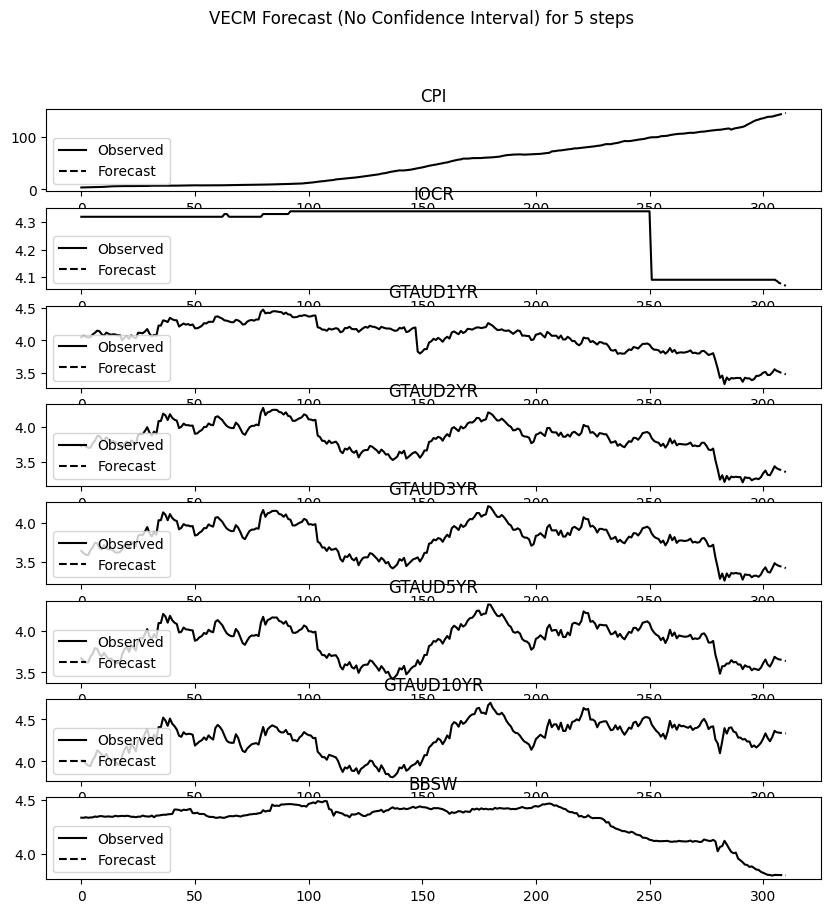

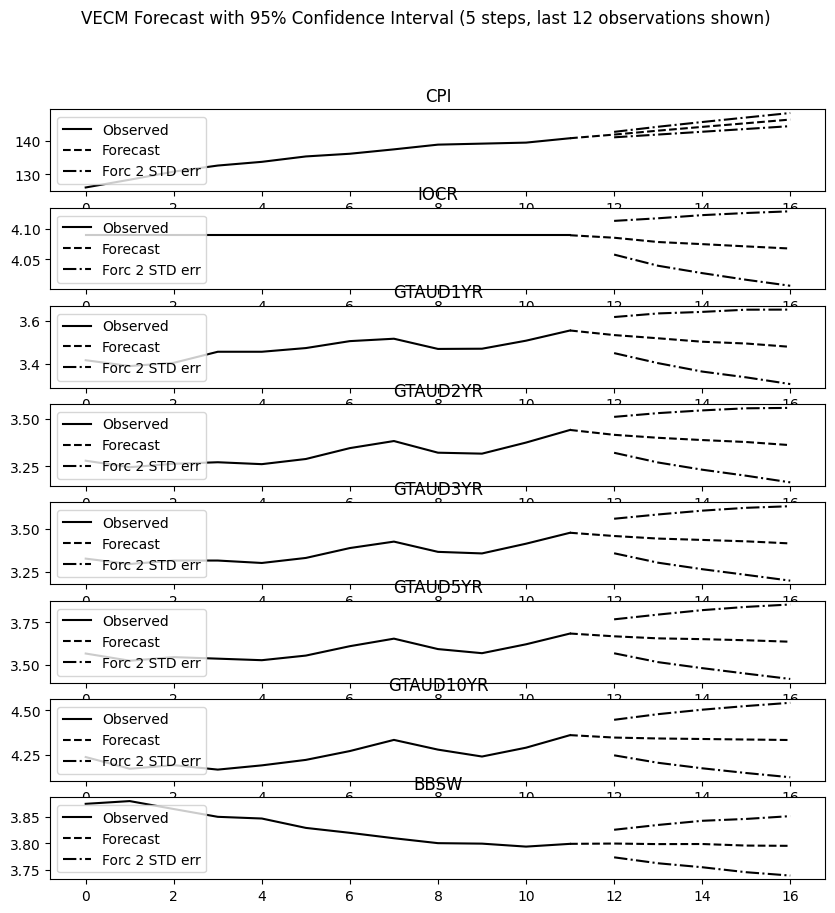

[[ 1.00805567e+00  1.94554015e+00 -1.75213945e-01  1.74335841e+00
  -2.19688215e+00  1.50301120e-02 -1.76058894e-02 -4.68985262e-01]
 [-6.19409008e-05  9.92895595e-01 -1.70422199e-03 -3.02614795e-02
   1.49033760e-02  1.39767867e-02 -1.82660643e-03  9.04026269e-03]
 [-3.00602606e-04 -2.21572725e-02  9.83637505e-01 -3.65698917e-01
   4.00331846e-01 -4.49516197e-02 -3.63031913e-02  4.88284491e-02]
 [-3.79421821e-04 -2.33160587e-02 -2.49366676e-02  3.84253163e-01
   7.52260795e-01 -1.49474834e-01 -6.52394819e-02  6.21751863e-02]
 [-3.24462187e-04 -1.58411922e-02 -2.01906798e-02 -3.76702442e-01
   1.36922260e+00 -9.24929876e-03 -3.67254362e-02  5.89458544e-02]
 [-2.99059988e-04 -1.31639063e-02 -2.16111856e-02 -4.92487136e-01
   5.84671106e-01  8.94365028e-01 -5.22133691e-02  5.26881612e-02]
 [-2.67389655e-04 -1.11690993e-02 -2.63926214e-02 -8.39549514e-01
   1.20744923e+00 -3.72347729e-01  9.02781040e-01  4.01444780e-02]
 [ 8.16685000e-05 -5.47650354e-03  6.28453429e-03 -2.88695475e-02
   

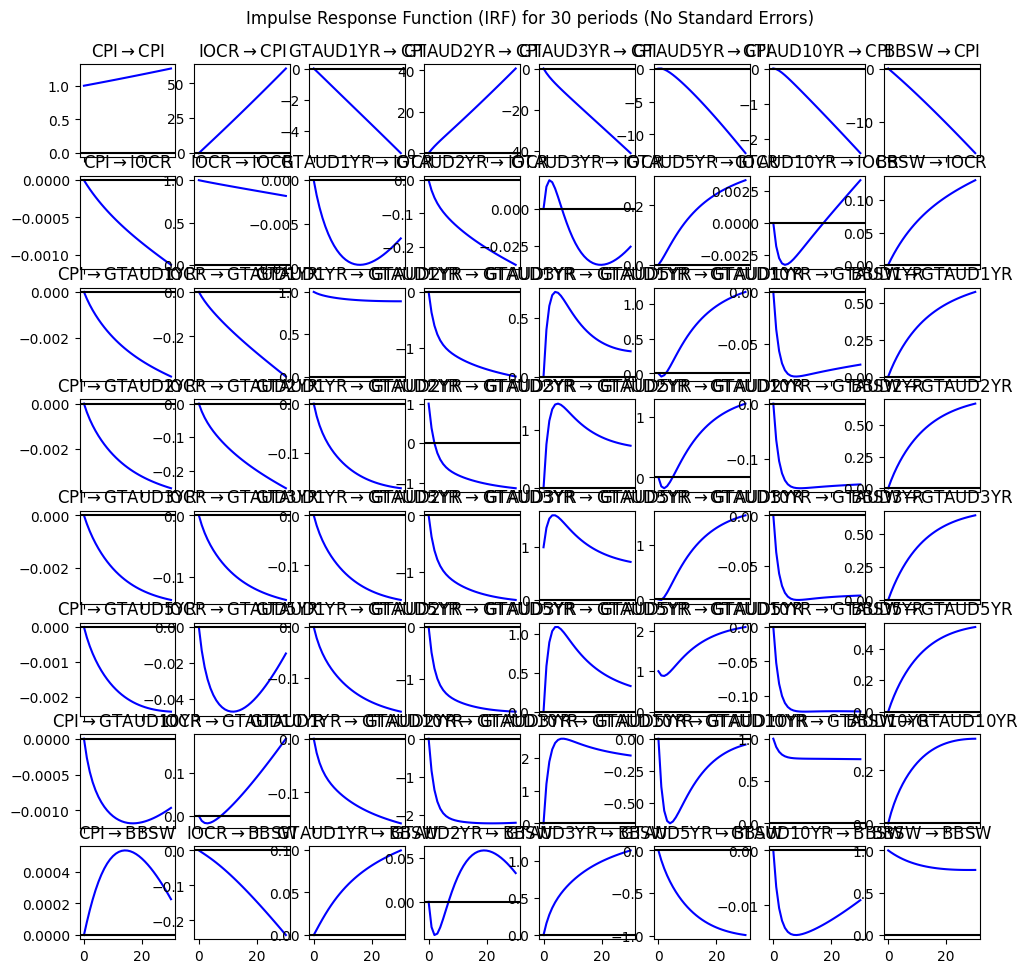

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.134e+06          26.30   0.000 16
----------------------------------------
1134201.4744733078 26.296227604864242 0.0
Adjusted Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 12 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         880.6          808.6   0.000 744
-----------------------------------------
880.6244795011849 808.5660965116425 0.0003859539374048586


In [8]:
max_lags_calc = int(len(df) / (len(df.columns) * 5))
max_lags_select = min(10, max_lags_calc)
lag_order = select_order(data=df, maxlags=max_lags_select, deterministic="ci", seasons=4)
print(lag_order.summary())
print(lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic)

# Select the cointegration rank
det_order = 0  # 0: constant, 1: trend, -1: none
k_ar_diff_for_rank_test = lag_order.aic
rank_test = select_coint_rank(df, det_order=det_order, k_ar_diff=k_ar_diff_for_rank_test, method="trace", signif=0.05)
print(rank_test.summary())
print(rank_test.rank)

# Fit the VECM model
k_ar_diff_final = lag_order.aic
coint_rank_final = rank_test.rank
model = VECM(df, deterministic="ci", seasons=4,
             k_ar_diff=k_ar_diff_final,
             coint_rank=coint_rank_final)
vecm_res = model.fit()
print(vecm_res.summary())
print(vecm_res.alpha)
print(vecm_res.stderr_alpha)

# Predictions
steps_to_predict = 5
forecast = vecm_res.predict(steps=steps_to_predict)
print(forecast)

forecast_ci = vecm_res.predict(steps=steps_to_predict, alpha=0.05)
for text, values in zip(("forecast", "lower", "upper"), forecast_ci):
    print(text+":", values, sep="\n")

# Print BBSW bounds to output
if 'BBSW' in df.columns:
    bbsw_idx = list(df.columns).index('BBSW')
    lower_bounds = forecast_ci[1][:, bbsw_idx]
    upper_bounds = forecast_ci[2][:, bbsw_idx]
    print('BBSW lower bounds:', lower_bounds)
    print('BBSW upper bounds:', upper_bounds)
else:
    print('BBSW not found in columns!')

# Plot Forecasts
vecm_res.plot_forecast(steps=steps_to_predict, plot_conf_int=False)
plt.suptitle(f"VECM Forecast (No Confidence Interval) for {steps_to_predict} steps")
plt.show()

n_last_obs_to_show = 12
vecm_res.plot_forecast(steps=steps_to_predict, n_last_obs=n_last_obs_to_show)
plt.suptitle(f"VECM Forecast with 95% Confidence Interval ({steps_to_predict} steps, last {n_last_obs_to_show} observations shown)")
plt.show()


# VAR and MA Representations
print(vecm_res.var_rep[0])
print(vecm_res.var_rep)
ma_order = 2
print(vecm_res.ma_rep(maxn=ma_order))

# Granger Causality Tests
# Using the first two columns for Granger causality tests as examples
caused_var1 = df.columns[0]
caused_var2 = df.columns[1]

granger_results_var1 = vecm_res.test_granger_causality(caused=caused_var1, signif=0.05)
print(granger_results_var1.summary())
print(granger_results_var1.signif, granger_results_var1.pvalue)

granger_results_var2 = vecm_res.test_granger_causality(caused=caused_var2, signif=0.05)
print(granger_results_var2.summary())
print(granger_results_var2.signif, granger_results_var2.pvalue)

# Instantaneous Causality Tests
# Using the first two columns for instantaneous causality tests as examples
causing_var1 = df.columns[0]
causing_var2 = df.columns[1]

inst_caus_var1 = vecm_res.test_inst_causality(causing=causing_var1)
print(inst_caus_var1.summary())

inst_caus_var2 = vecm_res.test_inst_causality(causing=causing_var2)
print(inst_caus_var2.summary())

# Impulse Response Function (IRF)
num_periods_irf = 30
ir = vecm_res.irf(periods=num_periods_irf)
ir.plot(plot_stderr=False)
plt.suptitle(f"Impulse Response Function (IRF) for {num_periods_irf} periods (No Standard Errors)")
plt.show()

# Residual Diagnostics: Normality Test
norm_test = vecm_res.test_normality()
print(norm_test.summary())
print(norm_test.test_statistic, norm_test.crit_value, norm_test.pvalue)

# Residual Diagnostics: Whiteness Test (Autocorrelation)
nlags_white_test = 12
white_test = vecm_res.test_whiteness(nlags=nlags_white_test, adjusted=True)
print(white_test.summary())
print(white_test.test_statistic, white_test.crit_value, white_test.pvalue)